# Case Study - Analyse the data of quarterly shipments transfer of a certain courier company in the $20^{th}$ century.

**Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import statsmodels
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

**Importing the Dataset**

In [2]:
df = pd.read_csv('ApplianceShipments.csv')

**Examining the Dataset**

In [3]:
df.head()

,Quarter,Year,Shipments
0,Q1,1985,4009
1,Q2,1985,4321
2,Q3,1985,4224
3,Q4,1985,3944
4,Q1,1986,4123


In [4]:
df.tail()

,Quarter,Year,Shipments
15,Q4,1988,4258
16,Q1,1989,4245
17,Q2,1989,4900
18,Q3,1989,4585
19,Q4,1989,4533


In [5]:
df.shape

(20, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Quarter    20 non-null     object
 1   Year       20 non-null     int64 
 2   Shipments  20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


We can see that the dataset goes from Q1 of 1985 to Q4 1989. The year and shipment variables are integers but the quarter is listed as an object.  We can add a timestamp based on quarterly data.  

In [7]:
date = pd.date_range(start='1/1/1985', end='1/1/1990', freq='Q')
date

DatetimeIndex(['1985-03-31', '1985-06-30', '1985-09-30', '1985-12-31',
               '1986-03-31', '1986-06-30', '1986-09-30', '1986-12-31',
               '1987-03-31', '1987-06-30', '1987-09-30', '1987-12-31',
               '1988-03-31', '1988-06-30', '1988-09-30', '1988-12-31',
               '1989-03-31', '1989-06-30', '1989-09-30', '1989-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [8]:
df['Time_Stamp'] = date
df.head()

,Quarter,Year,Shipments,Time_Stamp
0,Q1,1985,4009,1985-03-31
1,Q2,1985,4321,1985-06-30
2,Q3,1985,4224,1985-09-30
3,Q4,1985,3944,1985-12-31
4,Q1,1986,4123,1986-03-31


We need to set the time stamp column as the index and then drop the Quarter and Year columns. 

In [9]:
df.drop(labels=['Quarter','Year'],axis=1,inplace=True)

In [10]:
df.set_index(keys='Time_Stamp',drop=True,inplace=True)
df.head()

,Shipments
Time_Stamp,
1985-03-31,4009
1985-06-30,4321
1985-09-30,4224
1985-12-31,3944
1986-03-31,4123


## Plotting the Data

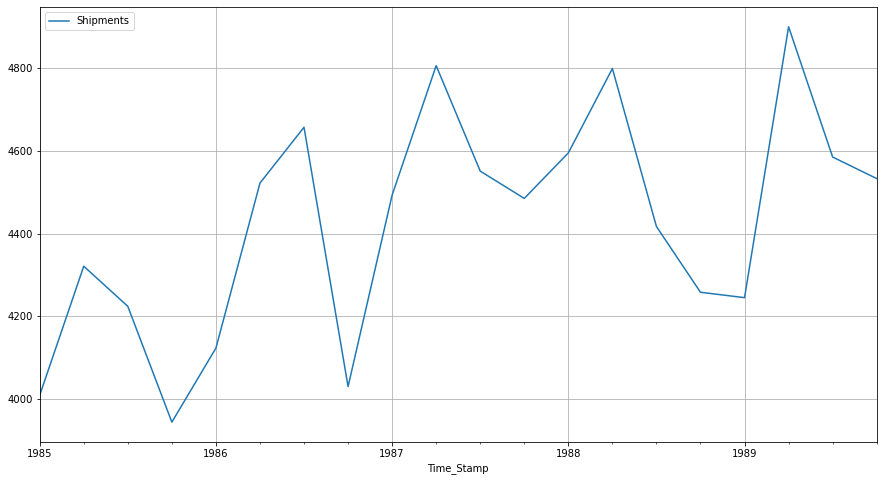

In [11]:
rcParams['figure.figsize'] = 15,8
df.plot()
plt.grid();

From the above graph, we can see that there is a seasonal component, with peaks around the end of first quarter and troughs around the end of the third quarter. We can also see a trend upwards in year over year shipping. 

In [12]:
df.describe()

,Shipments
count,20.000000
mean,4424.850000
std,274.089358
min,3944.000000
25%,4239.750000
50%,4489.000000
75%,4587.500000
max,4900.000000


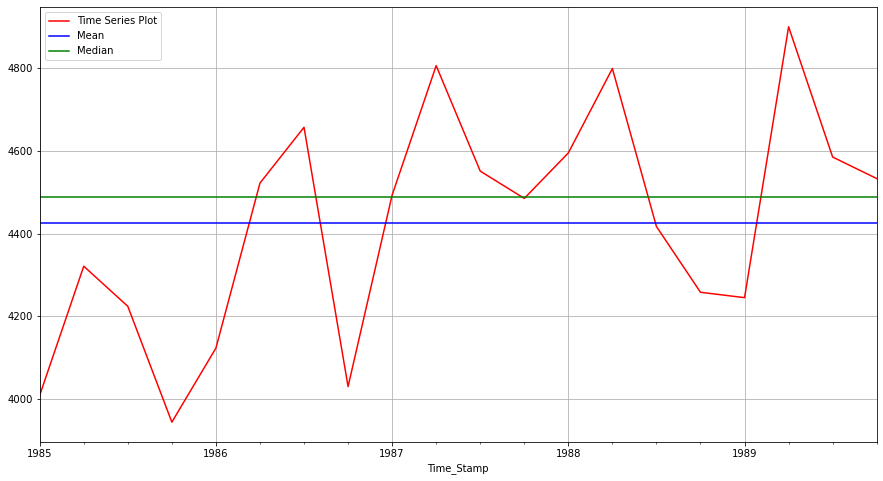

In [13]:
df.plot(color='Red')
plt.axhline(df['Shipments'].mean(),color='Blue')
plt.axhline(df['Shipments'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

Plotting the time series along with the median and mean values shows the fluctuations in the data

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


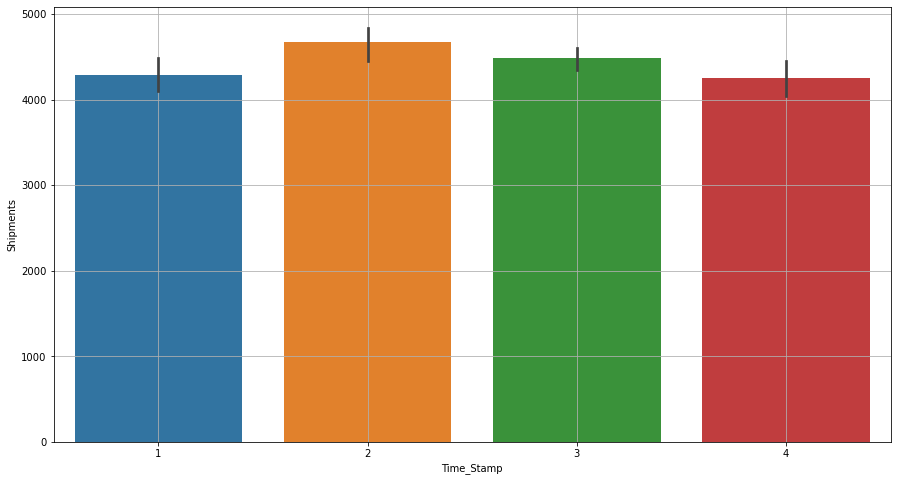

In [14]:
sns.barplot(df.index.quarter,df.Shipments,data=df)
plt.grid();

The above barplot shows a quarterly comparison of the shipments

**We can plot the year over year quarterly comparison of shipments by altering the dataframe slightly**

In [15]:
df.index.month_name

<bound method inherit_from_data.<locals>.method of DatetimeIndex(['1985-03-31', '1985-06-30', '1985-09-30', '1985-12-31',
               '1986-03-31', '1986-06-30', '1986-09-30', '1986-12-31',
               '1987-03-31', '1987-06-30', '1987-09-30', '1987-12-31',
               '1988-03-31', '1988-06-30', '1988-09-30', '1988-12-31',
               '1989-03-31', '1989-06-30', '1989-09-30', '1989-12-31'],
              dtype='datetime64[ns]', name='Time_Stamp', freq=None)>

In [16]:
quarterly_sales_across_years = pd.pivot_table(df, values = 'Shipments', columns = df.index.month_name(), index = df.index.year)
quarterly_sales_across_years

Time_Stamp,December,June,March,September
Time_Stamp,,,,
1985,3944,4321,4009,4224
1986,4030,4522,4123,4657
1987,4485,4806,4493,4551
1988,4258,4799,4595,4417
1989,4533,4900,4245,4585


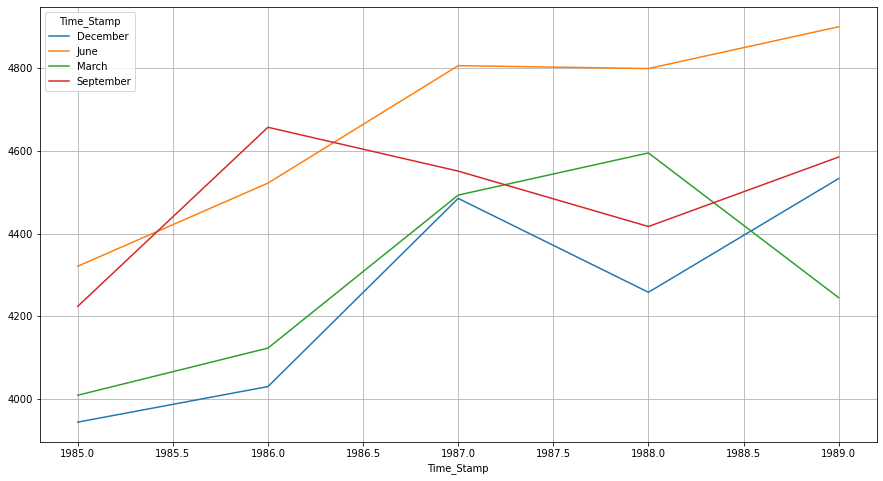

In [17]:
quarterly_sales_across_years.plot()
plt.grid()

**Distribution Plot for the Quarterly Comparison of the Shipments**

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

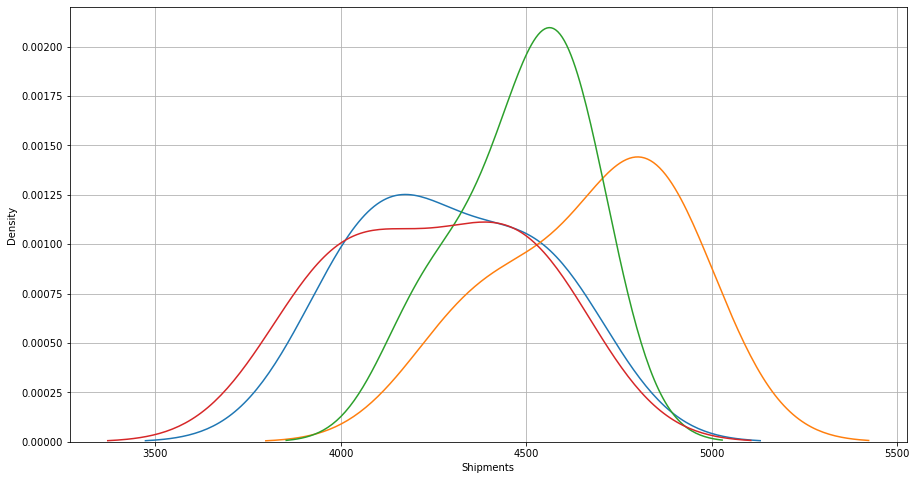

In [18]:
sns.distplot(df.loc[df.index.quarter == 1]['Shipments'],hist=False)
sns.distplot(df.loc[df.index.quarter == 2]['Shipments'],hist=False)
sns.distplot(df.loc[df.index.quarter == 3]['Shipments'],hist=False)
sns.distplot(df.loc[df.index.quarter == 4]['Shipments'],hist=False)
plt.grid();

C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mulli\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

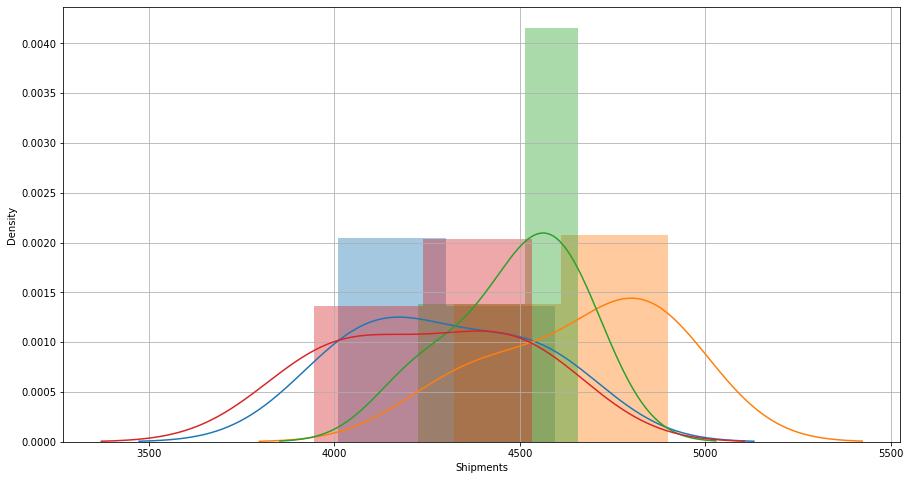

In [19]:
sns.distplot(df.loc[df.index.quarter == 1]['Shipments'])
sns.distplot(df.loc[df.index.quarter == 2]['Shipments'])
sns.distplot(df.loc[df.index.quarter == 3]['Shipments'])
sns.distplot(df.loc[df.index.quarter == 4]['Shipments'])
plt.grid();

**Decomposing the data**

We know from the above plots that there is a seasonal as well as year over year trend in the data.  We can decompose the data to examine these features more closely.

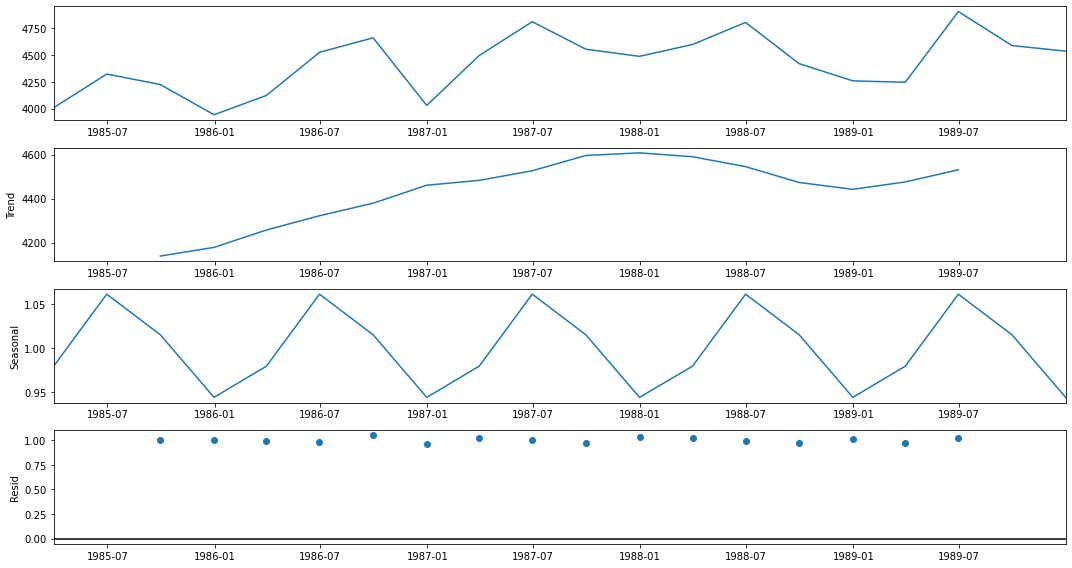

In [20]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [21]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [22]:
print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1985-03-31         NaN
1985-06-30         NaN
1985-09-30    4138.750
1985-12-31    4178.125
1986-03-31    4257.375
1986-06-30    4322.250
1986-09-30    4379.250
1986-12-31    4461.000
1987-03-31    4483.250
1987-06-30    4526.875
1987-09-30    4596.500
1987-12-31    4608.375
1988-03-31    4590.750
1988-06-30    4545.625
1988-09-30    4473.500
1988-12-31    4442.375
1989-03-31    4476.000
1989-06-30    4531.375
1989-09-30         NaN
1989-12-31         NaN
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1985-03-31    0.979648
1985-06-30    1.060879
1985-09-30    1.015027
1985-12-31    0.944446
1986-03-31    0.979648
1986-06-30    1.060879
1986-09-30    1.015027
1986-12-31    0.944446
1987-03-31    0.979648
1987-06-30    1.060879
1987-09-30    1.015027
1987-12-31    0.944446
1988-03-31    0.979648
1988-06-30    1.060879
1988-09-30    1.015027
1988-12-31    0.944446
1989-03-31    0.979648
1989-06-30    1.060879
1989-09-30    1.015027
1989-12-31    0.944446
Name: 